In [172]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
import random

import pandas as pd
import numpy as np
import math

In [173]:
titanic_data = pd.read_csv('C:/Users/taham/Desktop/7th semester/AI by Sir Ayyaz/Assignments/Titanic_data_Set.csv')

In [174]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Sex,Fare,Age,SibSp,Parch
0,1,0,3,1,7.2500,22.0,1,0
1,2,1,1,2,71.2833,38.0,1,0
2,3,1,3,2,7.9250,26.0,0,0
3,4,1,1,2,53.1000,35.0,1,0
4,5,0,3,1,8.0500,35.0,0,0
5,6,0,3,1,8.4583,28.0,0,0
6,7,0,1,1,51.8625,54.0,0,0
7,8,0,3,1,21.0750,2.0,3,1
8,9,1,3,2,11.1333,27.0,0,2
9,10,1,2,2,30.0708,14.0,1,0


In [5]:
# X_train, X_test, y_train, y_test = train_test_split(titanic_data, Y, test_size=0.30, random_state=1)

In [7]:
# X_train.head(5)

In [175]:
X = (titanic_data[['PassengerId','Sex','Pclass','Fare','Age','SibSp','Parch']])


In [176]:
X[0:5]

,PassengerId,Sex,Pclass,Fare,Age,SibSp,Parch
0,1,1,3,7.2500,22.0,1,0
1,2,2,1,71.2833,38.0,1,0
2,3,2,3,7.9250,26.0,0,0
3,4,2,1,53.1000,35.0,1,0
4,5,1,3,8.0500,35.0,0,0


In [201]:
Y = np.array(titanic_data[['Survived']])
Y = (titanic_data[['Survived']])
print(len(Y))
Y[0:5]

891


,Survived
0,0
1,1
2,1
3,1
4,0


In [202]:
cols_to_Normal = ['PassengerId','Sex','Pclass','Fare','Age','SibSp','Parch']

X_new= X[cols_to_Normal]
X_new.head(10)

,PassengerId,Sex,Pclass,Fare,Age,SibSp,Parch
0,1,1,3,7.2500,22.0,1,0
1,2,2,1,71.2833,38.0,1,0
2,3,2,3,7.9250,26.0,0,0
3,4,2,1,53.1000,35.0,1,0
4,5,1,3,8.0500,35.0,0,0
5,6,1,3,8.4583,28.0,0,0
6,7,1,1,51.8625,54.0,0,0
7,8,1,3,21.0750,2.0,3,1
8,9,2,3,11.1333,27.0,0,2
9,10,2,2,30.0708,14.0,1,0


In [ ]:
# Normalise the dimension

In [203]:
X_new = X_new[cols_to_Normal].apply( lambda rec:(rec - rec.mean())/rec.std(), axis =0)


In [204]:
type(X_new)

pandas.core.frame.DataFrame

In [205]:
X_new.head(10)
list(X_new)

['PassengerId', 'Sex', 'Pclass', 'Fare', 'Age', 'SibSp', 'Parch']

In [206]:
X_new = np.array(X_new)
X_new[0:5]

array([[-1.7291368 , -0.73728105,  0.82691282, -0.50216314, -0.53546848,
         0.43255043, -0.47340772],
       [-1.7252511 ,  1.35481262, -1.56522783,  0.78640362,  0.54160028,
         0.43255043, -0.47340772],
       [-1.7213654 ,  1.35481262,  0.82691282, -0.48857985, -0.26620129,
        -0.47427882, -0.47340772],
       [-1.7174797 ,  1.35481262, -1.56522783,  0.42049407,  0.33964988,
         0.43255043, -0.47340772],
       [-1.713594  , -0.73728105,  0.82691282, -0.48606443,  0.33964988,
        -0.47427882, -0.47340772]])

In [180]:
import random
def initialize_betas(dim):
    b = random.random()
    w = np.random.rand(dim)
    return b,w 
b,w = initialize_betas(X_new.shape[1])
print(b,w)

0.3836219382207263 [0.29167476 0.47873051 0.73978393 0.2190595  0.83787121 0.75631573
 0.23522628]


In [181]:
w.shape

(7,)

In [182]:
def sigmoid(b, w ,X_new):
    Z = b + np.matmul(X_new,w)
    return (1.0 / (1 + np.exp(-Z)))  


In [183]:
y_hat = sigmoid(b,w,X_new)

In [184]:
y_hat[0:5]

0    0.448974
1    0.553029
2    0.584612
3    0.491456
4    0.462727
dtype: float64

In [ ]:
# Define a function for calculating binary cross entropy loss function( Current cost RMSE)

In [185]:
def get_cost( y, y_hat):
        return - np.sum(np.dot(y.T,np.log(1-y_hat)+ np.dot((1-y).T,np.log(1-y_hat)))) / ( len(y))


In [191]:
# Reshape Y
# Y=Y.reshape(len(Y), )
current_cost= get_cost(Y,y_hat)
#print(current_cost)
Y.shape

(891, 1)

In [ ]:
# Define a function for updating beta values.

In [192]:
def update_beta (b_0, w_0 , y , y_hat, X_new, alpha):
    db = np.sum( y_hat - y)/ len(y)
    b_0 = b_0 - alpha * db
    dw = np.dot((y_hat - y), X_new)/ len(y)
    w_0 = w_0 - alpha * dw
   
   
    return b_0,w_0
    

In [193]:
alpha = 0.1

type(y_hat)
#(X_new).shape

pandas.core.series.Series

In [198]:
b,w = update_beta (b,w, Y, y_hat,X_new, alpha)

b.shape

ValueError: shapes (891,892) and (891,7) not aligned: 892 (dim 1) != 891 (dim 0)

In [72]:
# Write a code for gradient descent iterations

In [200]:
num_iterations = 50000
alpha = 0.001

all_costs = []
b,w = initialize_betas(X_new.shape[1])
print("initial guess of b and w: " , b ,w)

for each_iter in range (num_iterations ):
    y_hat = sigmoid(b, w , X_new)
    current_cost = get_cost (Y, y_hat)
    prev_b = b
    prev_w = w
    b, w = update_beta (prev_b, prev_w, Y, y_hat, X_new, alpha)
    all_costs.append(current_cost)
    if each_iter % 10 == 0:
        print('Iteration: ', each_iter, 'Cost: ', current_cost)
        each_iter += 1
    
print("Final estimates of b and q are:\n ", b,w)

initial guess of b and w:  0.39456466923470923 [0.29164872 0.95602831 0.35241885 0.65014687 0.19944929 0.53374305
 0.70959974]


ValueError: shapes (891,892) and (891,7) not aligned: 892 (dim 1) != 891 (dim 0)

In [ ]:
# Use sklearn logistic regression API

In [71]:
# lreg = LogisticRegression
lmodel = LogisticRegression().fit(X_new, Y)
lmodel.intercept_

array([-0.635415])

In [72]:
lmodel.coef_

array([[ 0.03027558,  1.30338106, -0.82324813,  0.15966279, -0.38921819,
        -0.34459986, -0.08535185]])

4

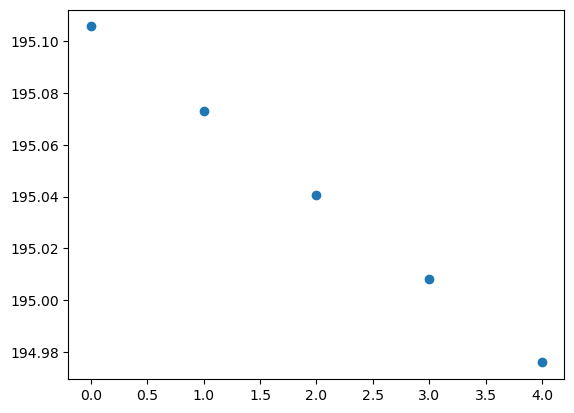

In [75]:
plt.scatter( range(num_iterations), all_costs)

len(range(each_iter))

In [ ]:
# Gradient descent is converging correctly for 500 iterations and with learning rate =0.5
# Plot the cost function for different alpha values, 0.01,0.001,0.0001

In [77]:
num_iterations = 10
alpha = 0.01

all_costs = []
b,w = initialize_betas(X_new.shape[1])
print("initial guess of b and w: " , b ,w)

for each_iter in range (num_iterations ):
    y_hat = sigmoid(b, w , X_new)
    current_cost = get_cost (Y, y_hat)
    prev_b = b
    prev_w = w
    b, w = update_beta (prev_b, prev_w, Y, y_hat, X_new, alpha)
    all_costs.append(current_cost)
    if each_iter % 10 == 0:
        print('Iteration: ', each_iter, 'Cost: ', current_cost)
        each_iter += 1
    
#print('b_0:', b_0, 'b_1:',b_1,'b_2:',b_2,'b_3:',b_3,'b_4:', b_4, 'b_5:',b_5,'b_6:',b_6,'b_7:',b_7,'b_8:',b_8,'b_9:',b_9)
print("Final estimates of b and q are: ", b,w)

initial guess of b and w:  0.11301969957810809 [0.05245601 0.79545638 0.71473454 0.98769961 0.4258518  0.47040941
 0.52167163]
Iteration:  0 Cost:  171.57483597868435
Final estimates of b and q are:  0.10255077468497217 [0.05272356 0.80249444 0.69824302 0.98862294 0.42239254 0.45570053
 0.5101683 ]


In [80]:
lreg = LogisticRegression()
lmodel = lreg.fit(X_new, Y)
lmodel.intercept_

array([-0.635415])

In [81]:
lmodel.coef_

array([[ 0.03027558,  1.30338106, -0.82324813,  0.15966279, -0.38921819,
        -0.34459986, -0.08535185]])

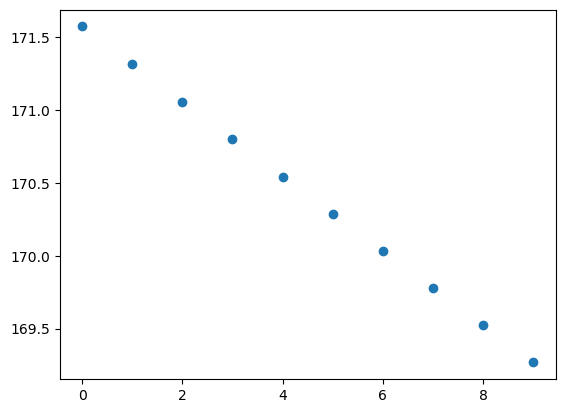

In [82]:
plt.scatter( range(num_iterations), all_costs)


In [83]:
num_iterations = 10
alpha = 0.001

all_costs = []
b,w = initialize_betas(X_new.shape[1])
print("initial guess of b and w: " , b ,w)

for each_iter in range (num_iterations ):
    y_hat = sigmoid(b, w , X_new)
    current_cost = get_cost (Y, y_hat)
    prev_b = b
    prev_w = w
    b, w = update_beta (prev_b, prev_w, Y, y_hat, X_new, alpha)
    all_costs.append(current_cost)
    if each_iter % 10 == 0:
        print('Iteration: ', each_iter, 'Cost: ', current_cost)
        each_iter += 1
    
#print('b_0:', b_0, 'b_1:',b_1,'b_2:',b_2,'b_3:',b_3,'b_4:', b_4, 'b_5:',b_5,'b_6:',b_6,'b_7:',b_7,'b_8:',b_8,'b_9:',b_9)
print("Final estimates of b and q are: ", b,w)

initial guess of b and w:  0.20236782648852158 [0.13106308 0.47860995 0.77814772 0.59864832 0.33606105 0.54183086
 0.57321431]
Iteration:  0 Cost:  195.77580222791508
Final estimates of b and q are:  0.20105098439327476 [0.13090278 0.48000375 0.77588641 0.59919765 0.33590382 0.54040518
 0.57214937]


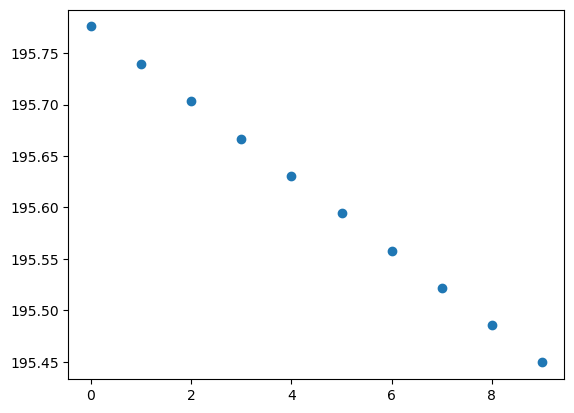

In [84]:
lreg = LogisticRegression()
lmodel = lreg.fit(X_new, Y)
lmodel.intercept_

lmodel.coef_

plt.scatter( range(num_iterations), all_costs)

In [87]:
# For alpha =0.0001
num_iterations = 50000
alpha = 0.0001

all_costs = []
b,w = initialize_betas(X_new.shape[1])
print("initial guess of b and w: " , b ,w)

for each_iter in range (num_iterations ):
    y_hat = sigmoid(b, w , X_new)
    current_cost = get_cost (Y, y_hat)
    prev_b = b
    prev_w = w
    b, w = update_beta (prev_b, prev_w, Y, y_hat, X_new, alpha)
    all_costs.append(current_cost)
    if each_iter % 10 == 0:
        print('Iteration: ', each_iter, 'Cost: ', current_cost)
        each_iter += 1
    
print("Final estimates of b and q are: ", b,w)

initial guess of b and w:  0.9600635496805471 [0.27704066 0.36465967 0.87266577 0.69852949 0.73442773 0.47227422
 0.47380554]
Iteration:  0 Cost:  294.52441394055177
Iteration:  10 Cost:  294.45805645144725
Iteration:  20 Cost:  294.39171905301885
Iteration:  30 Cost:  294.32540174073284
Iteration:  40 Cost:  294.2591045100531
Iteration:  50 Cost:  294.19282735644254
Iteration:  60 Cost:  294.12657027536284
Iteration:  70 Cost:  294.0603332622735
Iteration:  80 Cost:  293.9941163126331
Iteration:  90 Cost:  293.9279194218982
Iteration:  100 Cost:  293.86174258552467
Iteration:  110 Cost:  293.79558579896616
Iteration:  120 Cost:  293.72944905767537
Iteration:  130 Cost:  293.663332357103
Iteration:  140 Cost:  293.597235692699
Iteration:  150 Cost:  293.53115905991115
Iteration:  160 Cost:  293.4651024541862
Iteration:  170 Cost:  293.3990658709697
Iteration:  180 Cost:  293.333049305705
Iteration:  190 Cost:  293.2670527538343
Iteration:  200 Cost:  293.2010762107987
Iteration:  210 C

Iteration:  2590 Cost:  277.9958530387587
Iteration:  2600 Cost:  277.9345438660406
Iteration:  2610 Cost:  277.87325356903625
Iteration:  2620 Cost:  277.81198214293187
Iteration:  2630 Cost:  277.7507295829132
Iteration:  2640 Cost:  277.68949588416507
Iteration:  2650 Cost:  277.62828104187196
Iteration:  2660 Cost:  277.5670850512175
Iteration:  2670 Cost:  277.5059079073849
Iteration:  2680 Cost:  277.44474960555596
Iteration:  2690 Cost:  277.3836101409127
Iteration:  2700 Cost:  277.32248950863624
Iteration:  2710 Cost:  277.2613877039065
Iteration:  2720 Cost:  277.20030472190365
Iteration:  2730 Cost:  277.1392405578065
Iteration:  2740 Cost:  277.07819520679334
Iteration:  2750 Cost:  277.01716866404183
Iteration:  2760 Cost:  276.95616092472955
Iteration:  2770 Cost:  276.8951719840324
Iteration:  2780 Cost:  276.8342018371265
Iteration:  2790 Cost:  276.7732504791869
Iteration:  2800 Cost:  276.71231790538826
Iteration:  2810 Cost:  276.6514041109046
Iteration:  2820 Cost: 

Iteration:  4990 Cost:  263.8119807504655
Iteration:  5000 Cost:  263.75506252041544
Iteration:  5010 Cost:  263.6981619975531
Iteration:  5020 Cost:  263.6412791769792
Iteration:  5030 Cost:  263.5844140537942
Iteration:  5040 Cost:  263.5275666230989
Iteration:  5050 Cost:  263.4707368799935
Iteration:  5060 Cost:  263.41392481957877
Iteration:  5070 Cost:  263.3571304369549
Iteration:  5080 Cost:  263.30035372722233
Iteration:  5090 Cost:  263.2435946854817
Iteration:  5100 Cost:  263.1868533068329
Iteration:  5110 Cost:  263.13012958637637
Iteration:  5120 Cost:  263.0734235192123
Iteration:  5130 Cost:  263.01673510044105
Iteration:  5140 Cost:  262.9600643251627
Iteration:  5150 Cost:  262.9034111884773
Iteration:  5160 Cost:  262.8467756854851
Iteration:  5170 Cost:  262.79015781128606
Iteration:  5180 Cost:  262.73355756098056
Iteration:  5190 Cost:  262.6769749296684
Iteration:  5200 Cost:  262.6204099124498
Iteration:  5210 Cost:  262.5638625044249
Iteration:  5220 Cost:  262

Iteration:  7770 Cost:  248.65315439733212
Iteration:  7780 Cost:  248.6009704709983
Iteration:  7790 Cost:  248.548802895425
Iteration:  7800 Cost:  248.49665166577924
Iteration:  7810 Cost:  248.44451677722802
Iteration:  7820 Cost:  248.39239822493923
Iteration:  7830 Cost:  248.34029600408113
Iteration:  7840 Cost:  248.28821010982236
Iteration:  7850 Cost:  248.2361405373321
Iteration:  7860 Cost:  248.18408728178014
Iteration:  7870 Cost:  248.13205033833702
Iteration:  7880 Cost:  248.08002970217322
Iteration:  7890 Cost:  248.02802536846013
Iteration:  7900 Cost:  247.97603733236969
Iteration:  7910 Cost:  247.92406558907408
Iteration:  7920 Cost:  247.87211013374605
Iteration:  7930 Cost:  247.82017096155923
Iteration:  7940 Cost:  247.76824806768715
Iteration:  7950 Cost:  247.71634144730467
Iteration:  7960 Cost:  247.66445109558634
Iteration:  7970 Cost:  247.61257700770776
Iteration:  7980 Cost:  247.56071917884483
Iteration:  7990 Cost:  247.50887760417402
Iteration:  800

Iteration:  10160 Cost:  236.6354444035505
Iteration:  10170 Cost:  236.58703217372806
Iteration:  10180 Cost:  236.538635157139
Iteration:  10190 Cost:  236.49025334911144
Iteration:  10200 Cost:  236.4418867449744
Iteration:  10210 Cost:  236.39353534005744
Iteration:  10220 Cost:  236.34519912969134
Iteration:  10230 Cost:  236.29687810920728
Iteration:  10240 Cost:  236.2485722739375
Iteration:  10250 Cost:  236.20028161921527
Iteration:  10260 Cost:  236.1520061403744
Iteration:  10270 Cost:  236.10374583274955
Iteration:  10280 Cost:  236.05550069167643
Iteration:  10290 Cost:  236.0072707124914
Iteration:  10300 Cost:  235.95905589053174
Iteration:  10310 Cost:  235.9108562211354
Iteration:  10320 Cost:  235.8626716996416
Iteration:  10330 Cost:  235.81450232139005
Iteration:  10340 Cost:  235.76634808172142
Iteration:  10350 Cost:  235.7182089759771
Iteration:  10360 Cost:  235.67008499949952
Iteration:  10370 Cost:  235.6219761476319
Iteration:  10380 Cost:  235.57388241571817

Iteration:  12720 Cost:  224.72571690478927
Iteration:  12730 Cost:  224.68104924557625
Iteration:  12740 Cost:  224.63639563345785
Iteration:  12750 Cost:  224.59175606400603
Iteration:  12760 Cost:  224.54713053279386
Iteration:  12770 Cost:  224.50251903539564
Iteration:  12780 Cost:  224.4579215673863
Iteration:  12790 Cost:  224.41333812434218
Iteration:  12800 Cost:  224.36876870184057
Iteration:  12810 Cost:  224.32421329545966
Iteration:  12820 Cost:  224.27967190077922
Iteration:  12830 Cost:  224.23514451337937
Iteration:  12840 Cost:  224.19063112884186
Iteration:  12850 Cost:  224.1461317427491
Iteration:  12860 Cost:  224.10164635068486
Iteration:  12870 Cost:  224.05717494823392
Iteration:  12880 Cost:  224.01271753098177
Iteration:  12890 Cost:  223.96827409451572
Iteration:  12900 Cost:  223.92384463442326
Iteration:  12910 Cost:  223.87942914629352
Iteration:  12920 Cost:  223.83502762571658
Iteration:  12930 Cost:  223.79064006828344
Iteration:  12940 Cost:  223.74626

Iteration:  15390 Cost:  213.28461332068517
Iteration:  15400 Cost:  213.24354242071422
Iteration:  15410 Cost:  213.2024844247475
Iteration:  15420 Cost:  213.16143932865688
Iteration:  15430 Cost:  213.12040712831538
Iteration:  15440 Cost:  213.07938781959746
Iteration:  15450 Cost:  213.03838139837825
Iteration:  15460 Cost:  212.99738786053453
Iteration:  15470 Cost:  212.95640720194416
Iteration:  15480 Cost:  212.91543941848582
Iteration:  15490 Cost:  212.87448450603998
Iteration:  15500 Cost:  212.83354246048773
Iteration:  15510 Cost:  212.79261327771167
Iteration:  15520 Cost:  212.75169695359537
Iteration:  15530 Cost:  212.71079348402372
Iteration:  15540 Cost:  212.6699028648828
Iteration:  15550 Cost:  212.6290250920597
Iteration:  15560 Cost:  212.5881601614428
Iteration:  15570 Cost:  212.54730806892167
Iteration:  15580 Cost:  212.50646881038713
Iteration:  15590 Cost:  212.46564238173096
Iteration:  15600 Cost:  212.42482877884626
Iteration:  15610 Cost:  212.3840279

Iteration:  17810 Cost:  203.71228395012903
Iteration:  17820 Cost:  203.67421820785177
Iteration:  17830 Cost:  203.63616440526988
Iteration:  17840 Cost:  203.59812253854432
Iteration:  17850 Cost:  203.56009260383723
Iteration:  17860 Cost:  203.52207459731227
Iteration:  17870 Cost:  203.484068515134
Iteration:  17880 Cost:  203.44607435346828
Iteration:  17890 Cost:  203.4080921084821
Iteration:  17900 Cost:  203.37012177634375
Iteration:  17910 Cost:  203.3321633532226
Iteration:  17920 Cost:  203.29421683528955
Iteration:  17930 Cost:  203.25628221871634
Iteration:  17940 Cost:  203.21835949967593
Iteration:  17950 Cost:  203.1804486743428
Iteration:  17960 Cost:  203.14254973889234
Iteration:  17970 Cost:  203.1046626895013
Iteration:  17980 Cost:  203.0667875223475
Iteration:  17990 Cost:  203.02892423361016
Iteration:  18000 Cost:  202.99107281946945
Iteration:  18010 Cost:  202.95323327610697
Iteration:  18020 Cost:  202.9154055997055
Iteration:  18030 Cost:  202.87758978644

Iteration:  20780 Cost:  192.91536866605279
Iteration:  20790 Cost:  192.8806854638961
Iteration:  20800 Cost:  192.84601311401465
Iteration:  20810 Cost:  192.81135161292434
Iteration:  20820 Cost:  192.7767009571423
Iteration:  20830 Cost:  192.74206114318682
Iteration:  20840 Cost:  192.70743216757748
Iteration:  20850 Cost:  192.67281402683471
Iteration:  20860 Cost:  192.63820671748053
Iteration:  20870 Cost:  192.60361023603778
Iteration:  20880 Cost:  192.5690245790308
Iteration:  20890 Cost:  192.5344497429848
Iteration:  20900 Cost:  192.49988572442635
Iteration:  20910 Cost:  192.46533251988305
Iteration:  20920 Cost:  192.43079012588385
Iteration:  20930 Cost:  192.39625853895876
Iteration:  20940 Cost:  192.36173775563904
Iteration:  20950 Cost:  192.327227772457
Iteration:  20960 Cost:  192.2927285859461
Iteration:  20970 Cost:  192.25824019264124
Iteration:  20980 Cost:  192.2237625890782
Iteration:  20990 Cost:  192.18929577179412
Iteration:  21000 Cost:  192.15483973732

Iteration:  22990 Cost:  185.50812961842152
Iteration:  23000 Cost:  185.47576213553228
Iteration:  23010 Cost:  185.44340476310674
Iteration:  23020 Cost:  185.41105749791484
Iteration:  23030 Cost:  185.37872033672775
Iteration:  23040 Cost:  185.34639327631763
Iteration:  23050 Cost:  185.31407631345786
Iteration:  23060 Cost:  185.28176944492284
Iteration:  23070 Cost:  185.24947266748813
Iteration:  23080 Cost:  185.21718597793048
Iteration:  23090 Cost:  185.18490937302772
Iteration:  23100 Cost:  185.15264284955865
Iteration:  23110 Cost:  185.12038640430342
Iteration:  23120 Cost:  185.08814003404305
Iteration:  23130 Cost:  185.05590373555998
Iteration:  23140 Cost:  185.0236775056376
Iteration:  23150 Cost:  184.99146134106036
Iteration:  23160 Cost:  184.9592552386139
Iteration:  23170 Cost:  184.92705919508495
Iteration:  23180 Cost:  184.89487320726136
Iteration:  23190 Cost:  184.8626972719322
Iteration:  23200 Cost:  184.8305313858875
Iteration:  23210 Cost:  184.7983755

Iteration:  25520 Cost:  177.63302717931126
Iteration:  25530 Cost:  177.60311761448142
Iteration:  25540 Cost:  177.5732173778143
Iteration:  25550 Cost:  177.54332646635322
Iteration:  25560 Cost:  177.5134448771427
Iteration:  25570 Cost:  177.48357260722824
Iteration:  25580 Cost:  177.45370965365638
Iteration:  25590 Cost:  177.42385601347485
Iteration:  25600 Cost:  177.39401168373212
Iteration:  25610 Cost:  177.36417666147804
Iteration:  25620 Cost:  177.33435094376313
Iteration:  25630 Cost:  177.30453452763928
Iteration:  25640 Cost:  177.27472741015922
Iteration:  25650 Cost:  177.24492958837678
Iteration:  25660 Cost:  177.2151410593468
Iteration:  25670 Cost:  177.18536182012517
Iteration:  25680 Cost:  177.1555918677689
Iteration:  25690 Cost:  177.12583119933572
Iteration:  25700 Cost:  177.09607981188486
Iteration:  25710 Cost:  177.06633770247623
Iteration:  25720 Cost:  177.03660486817094
Iteration:  25730 Cost:  177.00688130603106
Iteration:  25740 Cost:  176.9771670

Iteration:  27900 Cost:  170.77120657601156
Iteration:  27910 Cost:  170.74343598723914
Iteration:  27920 Cost:  170.7156740514536
Iteration:  27930 Cost:  170.68792076593533
Iteration:  27940 Cost:  170.66017612796566
Iteration:  27950 Cost:  170.63244013482662
Iteration:  27960 Cost:  170.60471278380155
Iteration:  27970 Cost:  170.57699407217441
Iteration:  27980 Cost:  170.54928399723036
Iteration:  27990 Cost:  170.52158255625523
Iteration:  28000 Cost:  170.49388974653607
Iteration:  28010 Cost:  170.46620556536078
Iteration:  28020 Cost:  170.4385300100181
Iteration:  28030 Cost:  170.410863077798
Iteration:  28040 Cost:  170.383204765991
Iteration:  28050 Cost:  170.35555507188894
Iteration:  28060 Cost:  170.32791399278432
Iteration:  28070 Cost:  170.30028152597072
Iteration:  28080 Cost:  170.27265766874274
Iteration:  28090 Cost:  170.24504241839577
Iteration:  28100 Cost:  170.21743577222625
Iteration:  28110 Cost:  170.18983772753145
Iteration:  28120 Cost:  170.162248281

Iteration:  30470 Cost:  163.91137443155966
Iteration:  30480 Cost:  163.8857407810983
Iteration:  30490 Cost:  163.86011511482988
Iteration:  30500 Cost:  163.8344974302661
Iteration:  30510 Cost:  163.8088877249195
Iteration:  30520 Cost:  163.78328599630328
Iteration:  30530 Cost:  163.75769224193175
Iteration:  30540 Cost:  163.73210645932
Iteration:  30550 Cost:  163.70652864598375
Iteration:  30560 Cost:  163.6809587994399
Iteration:  30570 Cost:  163.65539691720596
Iteration:  30580 Cost:  163.6298429968004
Iteration:  30590 Cost:  163.6042970357424
Iteration:  30600 Cost:  163.57875903155218
Iteration:  30610 Cost:  163.5532289817507
Iteration:  30620 Cost:  163.52770688385974
Iteration:  30630 Cost:  163.502192735402
Iteration:  30640 Cost:  163.47668653390087
Iteration:  30650 Cost:  163.4511882768808
Iteration:  30660 Cost:  163.42569796186697
Iteration:  30670 Cost:  163.40021558638543
Iteration:  30680 Cost:  163.37474114796294
Iteration:  30690 Cost:  163.3492746441273
It

Iteration:  32740 Cost:  158.29264072908745
Iteration:  32750 Cost:  158.2687572524696
Iteration:  32760 Cost:  158.24488121620462
Iteration:  32770 Cost:  158.22101261798673
Iteration:  32780 Cost:  158.19715145551092
Iteration:  32790 Cost:  158.1732977264729
Iteration:  32800 Cost:  158.149451428569
Iteration:  32810 Cost:  158.12561255949674
Iteration:  32820 Cost:  158.10178111695382
Iteration:  32830 Cost:  158.0779570986391
Iteration:  32840 Cost:  158.0541405022521
Iteration:  32850 Cost:  158.03033132549305
Iteration:  32860 Cost:  158.0065295660629
Iteration:  32870 Cost:  157.98273522166355
Iteration:  32880 Cost:  157.9589482899974
Iteration:  32890 Cost:  157.93516876876777
Iteration:  32900 Cost:  157.91139665567866
Iteration:  32910 Cost:  157.88763194843492
Iteration:  32920 Cost:  157.86387464474197
Iteration:  32930 Cost:  157.84012474230624
Iteration:  32940 Cost:  157.81638223883468
Iteration:  32950 Cost:  157.79264713203514
Iteration:  32960 Cost:  157.76891941961

Iteration:  35140 Cost:  152.76884911332195
Iteration:  35150 Cost:  152.7466868646636
Iteration:  35160 Cost:  152.72453152383872
Iteration:  35170 Cost:  152.70238308871237
Iteration:  35180 Cost:  152.68024155715042
Iteration:  35190 Cost:  152.6581069270193
Iteration:  35200 Cost:  152.6359791961862
Iteration:  35210 Cost:  152.6138583625189
Iteration:  35220 Cost:  152.59174442388584
Iteration:  35230 Cost:  152.56963737815613
Iteration:  35240 Cost:  152.5475372231997
Iteration:  35250 Cost:  152.52544395688685
Iteration:  35260 Cost:  152.50335757708885
Iteration:  35270 Cost:  152.48127808167732
Iteration:  35280 Cost:  152.45920546852486
Iteration:  35290 Cost:  152.43713973550445
Iteration:  35300 Cost:  152.41508088048997
Iteration:  35310 Cost:  152.3930289013558
Iteration:  35320 Cost:  152.37098379597697
Iteration:  35330 Cost:  152.3489455622294
Iteration:  35340 Cost:  152.3269141979893
Iteration:  35350 Cost:  152.3048897011339
Iteration:  35360 Cost:  152.282872069540

Iteration:  37670 Cost:  147.37642214319524
Iteration:  37680 Cost:  147.3559412364688
Iteration:  37690 Cost:  147.33546671771214
Iteration:  37700 Cost:  147.31499858494738
Iteration:  37710 Cost:  147.29453683619715
Iteration:  37720 Cost:  147.2740814694846
Iteration:  37730 Cost:  147.2536324828337
Iteration:  37740 Cost:  147.23318987426873
Iteration:  37750 Cost:  147.21275364181466
Iteration:  37760 Cost:  147.19232378349696
Iteration:  37770 Cost:  147.17190029734184
Iteration:  37780 Cost:  147.15148318137588
Iteration:  37790 Cost:  147.1310724336264
Iteration:  37800 Cost:  147.11066805212118
Iteration:  37810 Cost:  147.0902700348886
Iteration:  37820 Cost:  147.06987837995766
Iteration:  37830 Cost:  147.0494930853579
Iteration:  37840 Cost:  147.0291141491194
Iteration:  37850 Cost:  147.00874156927287
Iteration:  37860 Cost:  146.98837534384958
Iteration:  37870 Cost:  146.96801547088128
Iteration:  37880 Cost:  146.94766194840042
Iteration:  37890 Cost:  146.9273147744

Iteration:  40140 Cost:  142.50688840480916
Iteration:  40150 Cost:  142.48792661522688
Iteration:  40160 Cost:  142.4689707417677
Iteration:  40170 Cost:  142.4500207825862
Iteration:  40180 Cost:  142.4310767358377
Iteration:  40190 Cost:  142.41213859967792
Iteration:  40200 Cost:  142.39320637226308
Iteration:  40210 Cost:  142.37428005174988
Iteration:  40220 Cost:  142.3553596362955
Iteration:  40230 Cost:  142.33644512405775
Iteration:  40240 Cost:  142.31753651319482
Iteration:  40250 Cost:  142.2986338018654
Iteration:  40260 Cost:  142.2797369882287
Iteration:  40270 Cost:  142.26084607044444
Iteration:  40280 Cost:  142.24196104667286
Iteration:  40290 Cost:  142.22308191507463
Iteration:  40300 Cost:  142.20420867381097
Iteration:  40310 Cost:  142.18534132104355
Iteration:  40320 Cost:  142.1664798549346
Iteration:  40330 Cost:  142.1476242736468
Iteration:  40340 Cost:  142.12877457534336
Iteration:  40350 Cost:  142.10993075818794
Iteration:  40360 Cost:  142.09109282034

Iteration:  42840 Cost:  137.59616818818594
Iteration:  42850 Cost:  137.57873830714152
Iteration:  42860 Cost:  137.5613138613309
Iteration:  42870 Cost:  137.54389484903484
Iteration:  42880 Cost:  137.5264812685345
Iteration:  42890 Cost:  137.5090731181115
Iteration:  42900 Cost:  137.49167039604782
Iteration:  42910 Cost:  137.474273100626
Iteration:  42920 Cost:  137.4568812301289
Iteration:  42930 Cost:  137.4394947828399
Iteration:  42940 Cost:  137.42211375704272
Iteration:  42950 Cost:  137.40473815102163
Iteration:  42960 Cost:  137.38736796306125
Iteration:  42970 Cost:  137.37000319144664
Iteration:  42980 Cost:  137.35264383446338
Iteration:  42990 Cost:  137.33528989039738
Iteration:  43000 Cost:  137.317941357535
Iteration:  43010 Cost:  137.30059823416315
Iteration:  43020 Cost:  137.28326051856902
Iteration:  43030 Cost:  137.26592820904025
Iteration:  43040 Cost:  137.24860130386506
Iteration:  43050 Cost:  137.23127980133194
Iteration:  43060 Cost:  137.213963699729

Iteration:  45570 Cost:  133.03394034463994
Iteration:  45580 Cost:  133.01793187236726
Iteration:  45590 Cost:  133.00192838158242
Iteration:  45600 Cost:  132.9859298706791
Iteration:  45610 Cost:  132.96993633805127
Iteration:  45620 Cost:  132.95394778209334
Iteration:  45630 Cost:  132.9379642012001
Iteration:  45640 Cost:  132.9219855937668
Iteration:  45650 Cost:  132.90601195818894
Iteration:  45660 Cost:  132.89004329286254
Iteration:  45670 Cost:  132.874079596184
Iteration:  45680 Cost:  132.85812086655005
Iteration:  45690 Cost:  132.84216710235788
Iteration:  45700 Cost:  132.82621830200495
Iteration:  45710 Cost:  132.81027446388933
Iteration:  45720 Cost:  132.79433558640926
Iteration:  45730 Cost:  132.77840166796355
Iteration:  45740 Cost:  132.76247270695126
Iteration:  45750 Cost:  132.74654870177196
Iteration:  45760 Cost:  132.7306296508255
Iteration:  45770 Cost:  132.71471555251222
Iteration:  45780 Cost:  132.69880640523283
Iteration:  45790 Cost:  132.682902207

Iteration:  48330 Cost:  128.79917349385246
Iteration:  48340 Cost:  128.7844802924181
Iteration:  48350 Cost:  128.7697916437329
Iteration:  48360 Cost:  128.7551075462957
Iteration:  48370 Cost:  128.74042799860598
Iteration:  48380 Cost:  128.72575299916332
Iteration:  48390 Cost:  128.7110825464679
Iteration:  48400 Cost:  128.69641663902001
Iteration:  48410 Cost:  128.6817552753206
Iteration:  48420 Cost:  128.66709845387084
Iteration:  48430 Cost:  128.65244617317225
Iteration:  48440 Cost:  128.63779843172688
Iteration:  48450 Cost:  128.62315522803684
Iteration:  48460 Cost:  128.60851656060498
Iteration:  48470 Cost:  128.5938824279343
Iteration:  48480 Cost:  128.57925282852818
Iteration:  48490 Cost:  128.56462776089046
Iteration:  48500 Cost:  128.5500072235253
Iteration:  48510 Cost:  128.53539121493725
Iteration:  48520 Cost:  128.52077973363117
Iteration:  48530 Cost:  128.5061727781124
Iteration:  48540 Cost:  128.49157034688656
Iteration:  48550 Cost:  128.47697243845

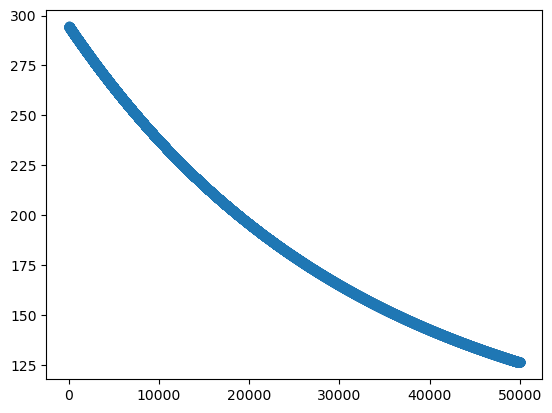

In [88]:
lreg = LogisticRegression()
lmodel = lreg.fit(X_new, Y)
lmodel.intercept_

lmodel.coef_

plt.scatter( range(num_iterations), all_costs)